In [14]:
import mysql.connector

def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="admin",
        password="quadeerash",
        database="employee_management"
    )

In [40]:
def add_employee(name, department, role, salary):
    conn = connect_db()
    cursor = conn.cursor()
    try:
        query = """
        INSERT INTO Employee (Name, Department, Role, Salary)
        VALUES (%s, %s, %s, %s)
        """
        cursor.execute(query, (name, department, role, salary))
        conn.commit()
        print("Employee added successfully!")
    except Exception as e:
        print("Error:", e)
    finally:
        cursor.close()
        conn.close()

# tested my function :)
# add_employee("quadeer","cybersec","analyst",610000)

In [12]:
def view_employees():
    conn = connect_db()
    cursor = conn.cursor()
    try:
        query = "SELECT * FROM Employee"
        cursor.execute(query)
        rows = cursor.fetchall()
        for row in rows:
            print(row)
    except Exception as e:
        print("Error:", e)
    finally:
        cursor.close()
        conn.close()
view_employees()

(1, 'quadeer', 'cybersec', 'analyst', Decimal('610000.00'), datetime.date(2025, 6, 20))


In [ ]:
def update_employee(emp_id, field, new_value):
    conn = connect_db()
    cursor = conn.cursor()
    try:
        query = f"UPDATE Employee SET {field} = %s WHERE ID = %s"
        cursor.execute(query, (new_value, emp_id))
        conn.commit()
        print("Employee updated successfully!")
    except Exception as e:
        print("Error:", e)
    finally:
        cursor.close()
        conn.close()


In [13]:
def delete_employee(emp_id):
    conn = connect_db()
    cursor = conn.cursor()
    try:
        query = "DELETE FROM Employee WHERE ID = %s"
        cursor.execute(query, (emp_id,))
        conn.commit()
        print("Employee deleted successfully!")
    except Exception as e:
        print("Error:", e)
    finally:
        cursor.close()
        conn.close()


In [17]:
def menu():
    while True:
        print("\nEmployee Management System")
        print("1. Add Employee")
        print("2. View Employees")
        print("3. Update Employee")
        print("4. Delete Employee")
        print("5. Exit")
        
        choice = input("Enter your choice: ")
        if choice == '1':
            name = input("Name: ")
            department = input("Department: ")
            role = input("Role: ")
            salary = float(input("Salary: "))
            add_employee(name, department, role, salary)
        elif choice == '2':
            view_employees()
        elif choice == '3':
            emp_id = int(input("Employee ID: "))
            field = input("Field to update (Name, Department, Role, Salary): ")
            new_value = input("New Value: ")
            update_employee(emp_id, field, new_value)
        elif choice == '4':
            emp_id = int(input("Employee ID: "))
            delete_employee(emp_id)
        elif choice == '5':
            break
        else:
            print("Invalid choice!")
menu()



Employee Management System
1. Add Employee
2. View Employees
3. Update Employee
4. Delete Employee
5. Exit


Enter your choice:  5


## meta


In [20]:
import requests

ACCESS_TOKEN = '43e40b256636d3e95f96e58e70e4277f'
BASE_URL = 'https://graph.facebook.com/v12.0'

def fetch_posts(page_id):
    url = f"{BASE_URL}/{page_id}/posts"
    params = {
        'access_token': ACCESS_TOKEN,
        'fields': 'id,message,created_time,insights.metric(post_engaged_users,post_impressions),likes.summary(true),comments.summary(true),shares'
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()['data']
    else:
        print("Error fetching data:", response.json())
        return None


In [21]:
import mysql.connector

def connect_db():
    return mysql.connector.connect(
        host="localhost",
        user="admin",
        password="quadeerash", 
        database="facebook_analytics"
    )


In [22]:
def save_post_to_db(post_data):
    conn = connect_db()
    cursor = conn.cursor()
    try:
        query = '''
            INSERT INTO Posts (PostID, Content, CreatedTime, Likes, Shares, Comments, EngagementRate)
            VALUES (%s, %s, %s, %s, %s, %s, %s)
            ON DUPLICATE KEY UPDATE
            Likes = VALUES(Likes), Shares = VALUES(Shares), Comments = VALUES(Comments), EngagementRate = VALUES(EngagementRate)
        '''
        cursor.execute(query, (
            post_data['id'],
            post_data.get('message', ''),
            post_data['created_time'],
            post_data['likes']['summary']['total_count'],
            post_data.get('shares', {}).get('count', 0),
            post_data['comments']['summary']['total_count'],
            calculate_engagement_rate(post_data)
        ))
        conn.commit()
        print(f"Post {post_data['id']} saved successfully!")
    except Exception as e:
        print("Error saving to database:", e)
    finally:
        cursor.close()
        conn.close()

def calculate_engagement_rate(post_data):
    likes = post_data['likes']['summary']['total_count']
    comments = post_data['comments']['summary']['total_count']
    shares = post_data.get('shares', {}).get('count', 0)
    impressions = post_data['insights']['data'][1]['values'][0]['value']  # Assuming post impressions are the 2nd metric
    return (likes + comments + shares) / impressions if impressions else 0


Enter the Facebook Page ID:  633829169822679


{'data': [{'id': '633829169822679_122095210304925216', 'message': 'hey', 'created_time': '2025-06-20T16:17:13+0000', 'likes': {'data': [], 'paging': {'cursors': {'before': 'QVFIUnhfM2tUQnkzWlEwZAG94Y1Y4MmlWSXVEcG1UT3ZAFLWUxeWNia3p4ZAHA2enl6c2w3MF8wUmJESUYtOVRvTXJZAcGxxWEs4THlaSzFxOEsyM0JIeE9JRUFR', 'after': 'QVFIUnhfM2tUQnkzWlEwZAG94Y1Y4MmlWSXVEcG1UT3ZAFLWUxeWNia3p4ZAHA2enl6c2w3MF8wUmJESUYtOVRvTXJZAcGxxWEs4THlaSzFxOEsyM0JIeE9JRUFR'}}, 'summary': {'total_count': 1, 'can_like': True, 'has_liked': True}}, 'comments': {'data': [], 'summary': {'order': 'chronological', 'total_count': 0, 'can_comment': True}}}], 'paging': {'cursors': {'before': 'QVFIUmJMQjk4WW1DdXo4UFJ1bWlzT2RJS0lEa1VYa1BNaGFQQ3FGN09ud0lWc0xtRFBjZAUpteXlXS3YzNE13VzFzQV8tbGdENkhHeVROWU8zUmRuZAnd2VjlsVEstTTI4SUF2R0g0LUFibXZAzZAjlGZA2p5SGNmY2p5RnBXOTY3WjRFeGxRMzdZASnROV1hCVEJGU3hzWGdpYUFSNGhMUTlUcFRtRjZArbzRWLUYtYkdZAQlFmR0F5dFFBbDVLVG5yQVltY0U1VmNSOWc2RExQNlRuX2hQYW1FbzJmU0k4eDB0cC1jUmx2VXJLblc2WVBQZAFpGR2swdlZAwZA2k4NWU1eFNMY

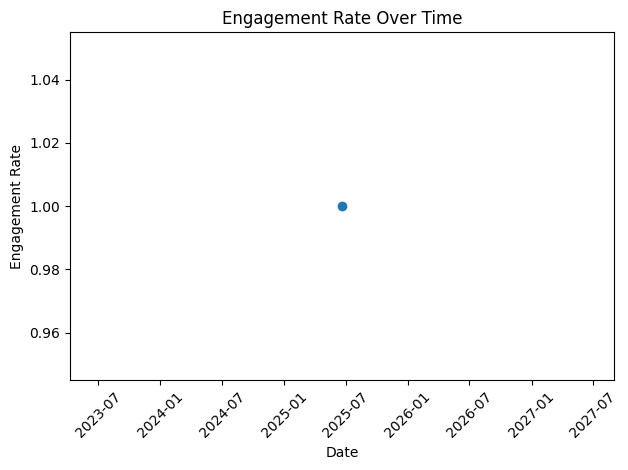

In [39]:
import requests
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sqlalchemy import create_engine


ACCESS_TOKEN = 'EAAegbBojuacBOZCQ8MvZCIJTH2tsfL8gsN2ZAe0J01Hb2paKssyJvEpqN0Ln5QBHKZB7mjc1WTK6EiD26FyRivb9YaZACcItFliRXF035XZC4BUDdNDBLo3PP5OuzWGgeWMaEPMIZC8t29wQeja28O5CmWkaLPFHxNBNwBKZA1VRXw8r19jsF5UyzZANk4oEHyDaLFMHmiBfQeCgIpXZBZByXYkY6FHLkM5MBGhEGHHd02J'  # Replace with your actual access token
BASE_URL = 'https://graph.facebook.com/v23.0'
DB_CONFIG = {
    'host': 'localhost',
    'user': 'admin',
    'password': 'quadeerash',  
    'database': 'facebook_analytics'
}
DB_URI = f"mysql+mysqlconnector://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}/{DB_CONFIG['database']}"

def connect_db():
    return mysql.connector.connect(**DB_CONFIG)

def init_db():
    conn = connect_db()
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS Posts (
            PostID VARCHAR(255) PRIMARY KEY,
            Content TEXT,
            CreatedTime DATETIME,
            Likes INT DEFAULT 0,
            Shares INT DEFAULT 0,
            Comments INT DEFAULT 0,
            EngagementRate FLOAT DEFAULT 0.0
        )
    ''')
    conn.commit()
    cursor.close()
    conn.close()

# API integration
def fetch_posts(page_id):
    url = f"{BASE_URL}/{page_id}/posts"
    params = {
        'access_token': ACCESS_TOKEN,
        'fields': 'id,message,created_time,likes.summary(true),comments.summary(true),shares'
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        print(response.json())  # Debug: Print raw API response
        return response.json().get('data', [])
    except requests.exceptions.RequestException as e:
        print("Error fetching data:", e)
        return []

def save_post_to_db(post_data):
    conn = connect_db()
    cursor = conn.cursor()
    try:
        created_time = post_data['created_time']
        formatted_time = datetime.strptime(created_time, '%Y-%m-%dT%H:%M:%S%z').strftime('%Y-%m-%d %H:%M:%S')
        
        query = '''
            INSERT INTO Posts (PostID, Content, CreatedTime, Likes, Shares, Comments, EngagementRate)
            VALUES (%s, %s, %s, %s, %s, %s, %s)
            ON DUPLICATE KEY UPDATE
            Likes = VALUES(Likes), Shares = VALUES(Shares), Comments = VALUES(Comments), EngagementRate = VALUES(EngagementRate)
        '''
        cursor.execute(query, (
            post_data['id'],
            post_data.get('message', ''),
            formatted_time,
            post_data.get('likes', {}).get('summary', {}).get('total_count', 0),
            post_data.get('shares', {}).get('count', 0),
            post_data.get('comments', {}).get('summary', {}).get('total_count', 0),
            calculate_engagement_rate(post_data)
        ))
        conn.commit()
        print(f"Post {post_data['id']} saved successfully!")
    except Exception as e:
        print("Error saving to database:", e)
    finally:
        cursor.close()
        conn.close()

def calculate_engagement_rate(post_data):
    likes = post_data.get('likes', {}).get('summary', {}).get('total_count', 0)
    comments = post_data.get('comments', {}).get('summary', {}).get('total_count', 0)
    shares = post_data.get('shares', {}).get('count', 0)
    
    impressions = 1  # Set to 1 to avoid division by zero; replace with actual value if available
    return (likes + comments + shares) / impressions if impressions else 0.0

def analyze_total_metrics():
    conn = connect_db()
    cursor = conn.cursor(dictionary=True)
    cursor.execute('''
        SELECT SUM(Likes) AS TotalLikes, SUM(Shares) AS TotalShares, SUM(Comments) AS TotalComments FROM Posts
    ''')
    result = cursor.fetchone()
    cursor.close()
    conn.close()
    return result

def visualize_engagement_trends():
    engine = create_engine(DB_URI)
    query = 'SELECT CreatedTime, EngagementRate FROM Posts ORDER BY CreatedTime'
    df = pd.read_sql_query(query, con=engine)

    df['CreatedTime'] = pd.to_datetime(df['CreatedTime'])
    plt.plot(df['CreatedTime'], df['EngagementRate'], marker='o')
    plt.title('Engagement Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Engagement Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function
def main():
    init_db()

    page_id = input("Enter the Facebook Page ID: ")
    posts = fetch_posts(page_id)
    for post in posts:
        save_post_to_db(post)

    print("\nTotal Metrics:")
    metrics = analyze_total_metrics()
    print(metrics)

    print("\nVisualizing Engagement Trends...")
    visualize_engagement_trends()

if __name__ == "__main__":
    main()
